# 作業

以正確的副檔名下載網頁中的圖片
範例網頁:https://www.ptt.cc/bbs/Beauty/M.1556291059.A.75A.html

Note：因為 PTT 會詢問「是否滿 18 歲」，這邊可以用 cookies 繞過

`requests.get(URL, cookies={'over18': '1'}`


In [1]:
import requests
import os

from bs4 import BeautifulSoup
from PIL import Image

In [10]:
url = 'https://www.ptt.cc/bbs/Beauty/M.1556291059.A.75A.html'
resp = requests.get(url, cookies={'over18': '1'})
soup = BeautifulSoup(resp.text)
soup

s="f3 hl push-userid">sophie0629</span><span class="f3 push-content">: 版皇下台</span><span class="push-ipdatetime"> 04/27 01:36
</span></div><div class="push"><span class="hl push-tag">推 </span><span class="f3 hl push-userid">LuxuriaSky</span><span class="f3 push-content">: 版皇下台</span><span class="push-ipdatetime"> 04/27 01:36
</span></div><div class="push"><span class="hl push-tag">推 </span><span class="f3 hl push-userid">Erlkonig</span><span class="f3 push-content">: 下台la</span><span class="push-ipdatetime"> 04/27 01:39
</span></div><div class="push"><span class="hl push-tag">推 </span><span class="f3 hl push-userid">nelly123</span><span class="f3 push-content">: 版皇下臺</span><span class="push-ipdatetime"> 04/27 01:39
</span></div><div class="push"><span class="hl push-tag">推 </span><span class="f3 hl push-userid">whitepig1409</span><span class="f3 push-content">: 板皇下臺</span><span class="push-ipdatetime"> 04/27 01:46
</span></div><div class="push"><span class="hl push-tag">推 </span><span c

Save image D:/1st-PyCrawlerMarathon/homework/Data/example_HW009/Cgb5oo1.jpeg
Save image D:/1st-PyCrawlerMarathon/homework/Data/example_HW009/MgjHY4f.jpeg
Save image D:/1st-PyCrawlerMarathon/homework/Data/example_HW009/yeoRtAs.jpeg
Save image D:/1st-PyCrawlerMarathon/homework/Data/example_HW009/wsauNEW.jpeg
Save image D:/1st-PyCrawlerMarathon/homework/Data/example_HW009/IjiETcs.jpeg


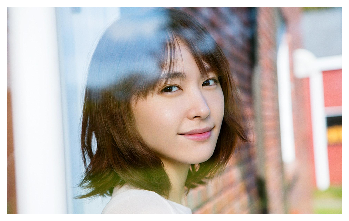

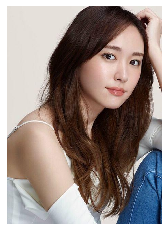

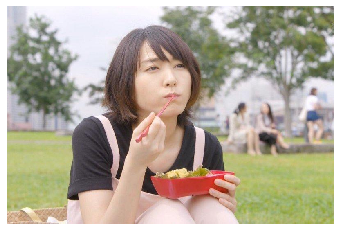

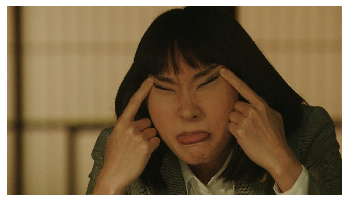

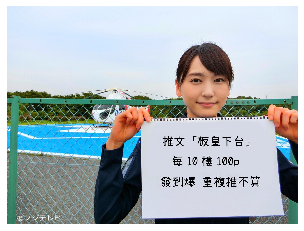

<Figure size 432x288 with 0 Axes>

In [25]:
# 決定要儲存的資料夾
output_dir = 'D:/1st-PyCrawlerMarathon/homework/Data/example_HW009'

# 假如資料夾不存在就新增一個資料夾
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 定位所有圖片的 tag

image_tags = soup.find(id='main-content').findChildren('a', recursive=False)
for img_tag in image_tags:
    
    # 取得所有圖片在第三方服務的 id
    if 'imgur' not in img_tag['href']:
    # 方法2:if 'imgur' not in img_tag.a['href']:    
        continue
    img_id = img_tag['href'].split('/')[-1]
    # 方法2：img_id = img_tag.a['href'].split('/')[-1]
    # 組合圖片而非網站的網址
    img_url = 'https://i.imgur.com/{}.jpg'.format(img_id)
    # 對圖片送出請求
    with requests.get(img_url, stream=True) as r:
        r.raise_for_status() #檢查Http請求是否成功，不成功會顯示error4XX
        # 檢查圖片副檔名
        img = Image.open(r.raw)
        img_savename = '{outdir}/{img_id}.{img_ext}'.format(
            outdir=output_dir, img_id=img_id, img_ext=img.format.lower())
        img.save(img_savename)
        print(f'Save image {img_savename}')
        # 讀取圖片
        %matplotlib inline
        import matplotlib.pyplot as plt
        import matplotlib.image as mpimg
        img = mpimg.imread(img_savename)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        plt.clf()